

### Exploratory Data Analysis of the Indian StartUp Funding Ecosystem 

### Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

### Hypothesis 1:

#### NULL Hypothesis (HO) :

#### ** The stage of a company has no impact on the amount of funding it receives. **


#### ALTERNATE Hypothesis (HA):

#### ** The stage of a company has an impact on the amount of funding it receives. **

### Hypothesis 2:

#### NULL Hypothesis (HO) :

#### ** The location of a company has no impact on the amount of funding it receives. **


#### ALTERNATE Hypothesis (HA):

#### ** The location of a company has an impact on the amount of funding it receives. **

### Hypothesis 3:

#### NULL Hypothesis (HO) :

#### ** The sector of a company has no impact on the amount of funding it receives. **


#### ALTERNATE Hypothesis (HA):

#### ** The sector of a company has an impact on the amount of funding it receives. **



#### Questions

    

    1. Which sector attracted the largest funding?

    2. What is the range of funds (max_Amount, min_Amount, mean_Amount, median_Amount, std_Amount of funding)? in the dataset?

    3. Which are 5 top sectors with most companies?

    4. Which are the top 5 companies in the funding amounts?

    5. Are there any outliers in the funding amounts in the datasets?

    6. Which top 5 locations have the highest number of companies in the datasets?

    7. What is the range of funds (Max, min, avg, and count of funding)? in the location with the highest number of companies.

    8. What is the trend in startup funding in India over the years?

In [1]:
%pip install matplotlib 
%pip install seaborn
%pip3 install wheel
%pip install pyodbc  
%pip install python-dotenv 
%pip install pandas

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.
/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%pip3` not found.


In [2]:
import os
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
# import wget
from forex_python.converter import CurrencyRates


warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
# driver = environment_variables.get("DRIVER")


# connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP1};PWD={G7x@9kR$2x}"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)
#connection = pyodbc.connect(connection_string)


OperationalError: ('HYT00', '[HYT00] [Microsoft][ODBC Driver 17 for SQL Server]Login timeout expired (0) (SQLDriverConnect)')

In [ ]:
query2020 = "Select * from dbo.LP1_startup_funding2020"
query2021 = "Select * from dbo.LP1_startup_funding2021"
data2020 = pd.read_sql(query2020, connection)
data2021 = pd.read_sql(query2021, connection)

In [ ]:
print(os.listdir())

['microsoft.asc.1', 'CleaningData2020-2021.ipynb', 'data2021.csv', 'venv', '.~lock.startup_funding2018.csv#', 'README.md', 'startup_funding2018.csv', '.env', '.~lock.startup_funding2019.csv#', 'data2018.csv', '.gitignore', 'Indian_Ecosystem_Analysis_LP1.ipynb', 'LICENSE', '.git', 'startup_funding2019.csv', 'microsoft.asc', 'data2020.csv', 'CleaningData2018-2019.ipynb', 'data2019.csv']


In [ ]:
data2020.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [ ]:
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [ ]:
data2019 = pd.read_csv('startup_funding2019.csv')
data2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [ ]:
data2018 = pd.read_csv('startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN


## DATA 2018 CLEANING

In [ ]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Unnamed: 6     1 non-null      object
dtypes: object(7)
memory usage: 28.9+ KB


In [ ]:
data2018.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company Name       0
Industry           0
Round/Series       0
Amount             0
Location           0
About Company      0
Unnamed: 6       525
dtype: int64

In [ ]:
missing_value = ['','N/a','NAN','na']
data2018 = pd.read_csv('startup_funding2018.csv', na_values=missing_value)
data2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount             0
Location           0
About Company      0
Unnamed: 6       525
dtype: int64

In [ ]:
data2018.shape

(526, 7)

In [ ]:

data2018.columns


Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Unnamed: 6'],
      dtype='object')

In [ ]:
data2018['Unnamed: 6']

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8                             NaN
9                             NaN
10                            NaN
11                            NaN
12                            NaN
13                            NaN
14                            NaN
15                            NaN
16                            NaN
17                            NaN
18                            NaN
19                            NaN
20                            NaN
21                            NaN
22                            NaN
23                            NaN
24                            NaN
25                            NaN
26                            NaN
27                            NaN
28                            NaN
29            

In [ ]:
# data2018.drop(columns=['Unnamed: 6','Investor'], inplace=True)
data2018.columns


Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Unnamed: 6'],
      dtype='object')


**Cleaning the 'Location' column**

In [ ]:
# Bangalore and Bengaluru are different names for the same city.
# Replace all occurrences of 'Bengaluru' with 'Bangalore'.
data2018['Location'] = data2018['Location'].str.replace('Bengaluru', 'Bangalore', case=False)
data2018['Location'] = data2018['Location'].str.replace('Bangalore city', 'Bangalore', case=False)

data2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bangalore, Karnataka, India",Hasura is a platform that allows developers to...,NaN
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,"₹16,000,000","Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,NaN
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,NaN
8,Freightwalla,"Information Services, Information Technology",Seed,—,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,NaN
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,NaN


In [ ]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Unnamed: 6     1 non-null      object
dtypes: object(7)
memory usage: 28.9+ KB


In [ ]:
data2018.duplicated().sum() #checking if there are duplicates

1

In [ ]:
data2018.loc[data2018.duplicated(keep=False ), :]#displaying the duplicated row

,Company Name,Industry,Round/Series,Amount,Location,About Company,Unnamed: 6
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN


In [ ]:
data2018 = data2018.drop_duplicates() #Droping duplicate rows
data2018.shape

(525, 7)

*** DATA TYPE ISSUES ***

In [ ]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
 6   Unnamed: 6     1 non-null      object
dtypes: object(7)
memory usage: 32.8+ KB


In [ ]:
data2018['Amount'].head()

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

In [ ]:
# Cleaning the Amounts column
data2018['Amount'] = data2018['Amount'].apply(str)
data2018['Amount'].replace(",", "", inplace = True, regex=True)
data2018['Amount'].replace("—", '0', inplace = True, regex=True)
data2018['Amount'].replace("$", "", inplace = True, regex=True)

In [ ]:
data2018['Amount']

0            250000
1         ₹40000000
2         ₹65000000
3           2000000
4                 0
5           1600000
6         ₹16000000
7         ₹50000000
8                 0
9                 0
10                0
11                0
12                0
13                0
14                0
15       ₹100000000
16           150000
17          1100000
18                0
19          ₹500000
20          6000000
21           650000
22        ₹35000000
23        ₹64000000
24                0
25                0
26          2000000
27          2000000
28          2000000
29                0
30        ₹20000000
31          1000000
32                0
33           650000
34          1000000
35          5000000
36          4000000
37        ₹30000000
38          1000000
39          2800000
40                0
41           150000
42        ₹40000000
43          1000000
44          1700000
45                0
46          1300000
47          2000000
48                0
49         ₹5000000


In [ ]:
# create a new column 'Year' and set it to 2018 to differentiate it from the other datasets


*** DATA CURRENCY CONVERSION ***

In [ ]:
# Create an instance of the CurrencyRates class
c = CurrencyRates()

# Function to convert INR to USD
def convert_to_usd(amount):
    if isinstance(amount, str) and amount.startswith('₹'):
        amount = amount[1:]  # Remove the currency symbol
        amount = amount.replace(',', '')  # Remove commas if present
        amount = float(amount)  # Convert to float
        return c.convert('INR', 'USD', amount)
    else:
        return amount

# Apply the conversion function to the 'Amount' column
data2018['Amount'] = data2018['Amount'].apply(convert_to_usd)
data2018['Amount'] = data2018['Amount'].apply(lambda x: float(str(x).replace("$","")))
# Define a lambda function to format the amount
format_amount = lambda amount: "{:,.2f}".format(amount)

# Apply the formatting lambda function to the 'Amount' column
data2018['Amount'] = data2018['Amount'].map(format_amount)






In [ ]:
data2018['Amount'].isnull().sum()

0

In [ ]:
data2018['Amount'].head()

0      250,000.00
1      485,093.94
2      788,277.65
3    2,000,000.00
4            0.00
Name: Amount, dtype: object

In [ ]:
#  convert column to float
data2018['Amount'] = data2018['Amount'].str.replace(',', '').astype(float)
data2018['Amount'].head()

0     250000.00
1     485093.94
2     788277.65
3    2000000.00
4          0.00
Name: Amount, dtype: float64

In [ ]:
data2018.drop(columns=['Unnamed: 6'], inplace=True)

In [ ]:

data2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

*** COLUMNS RENAMING ***

In [ ]:
data2018.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage',
                        'What it does' : 'About'},
             inplace = True)

In [ ]:
data2018.columns

Index(['Company', 'Sector', 'Stage', 'Amount', 'Location', 'About'], dtype='object')

In [ ]:
# create a new column 'Year' and set it to 2018 to differentiate it from the other datasets
data2018.insert(0,'Year', 2018)
data2018.head()

,Year,Company,Sector,Stage,Amount,Location,About
0,2018,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.00,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,2018,Happy Cow Dairy,"Agriculture, Farming",Seed,485093.94,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,2018,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,788277.65,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,2018,PayMe India,"Financial Services, FinTech",Angel,2000000.00,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,2018,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,0.00,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


### DATA 2019 CLEANING

In [ ]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [ ]:
data2019.isnull().sum() #calculate the number of missing values (null or NaN values) in each column of a DataFrame.

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [ ]:
data2019.shape

(89, 9)

In [ ]:
missing_value = ['','N/a','NAN','na']
data2019 = pd.read_csv('startup_funding2019.csv', na_values=missing_value)
data2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [ ]:
data2019.duplicated().sum() #checking if there are duplicates




0

In [ ]:
data2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [ ]:
data2018.columns

Index(['Year', 'Company', 'Sector', 'Stage', 'Amount', 'Location', 'About'], dtype='object')

In [ ]:
# Droping unwanted columns

data2019.drop(columns=['Founded','Founders', 'Investor'], inplace=True)

In [ ]:
#Renaming columnsb
data2019.rename(columns = {
                        'Amount($)':'Amount',
                        'HeadQuarter':'Location',
                        'What it does':'About',
                        'Company/Brand':'Company',
                        },
             inplace = True)

In [ ]:
data2018.columns

Index(['Year', 'Company', 'Sector', 'Stage', 'Amount', 'Location', 'About'], dtype='object')

In [ ]:
data2019.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

In [ ]:
data2019.isnull().sum()

Company      0
Location    19
Sector       5
About        0
Amount       0
Stage       46
dtype: int64

**Cleaning the 'Sector' column**

In [ ]:
data2019['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [ ]:
# Replace "Edtech" with "EdTech" in the 'Sector' column
data2019['Sector'] = data2019['Sector'].replace('Edtech', 'EdTech')
data2019['Sector'].unique()

array(['Ecommerce', 'EdTech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [ ]:
# Replace "Fintech" with "FinTech" in the 'Sector' column
data2019['Sector'] = data2019['Sector'].replace('Fintech', 'FinTech')
data2019['Sector'].unique()

**Cleaning the 'Stage' column**

In [ ]:
# Replace all missing values in the 'Stage' column with the string "Notknown".
data2019['Stage'] = data2019['Stage'].fillna('Notknown')
data2019.head()

,Company,Location,Sector,About,Amount,Stage
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",Notknown
1,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,"$150,000,000",Series C
2,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",Notknown


In [ ]:
# Get unique funding stages
data2019['Stage'].unique()

array(['Notknown', 'Series C', 'Fresh funding', 'Series D',
       'Pre series A', 'Series A', 'Series G', 'Series B',
       'Post series A', 'Seed funding', 'Seed fund', 'Series E',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A'],
      dtype=object)

**Cleaning the 'Location' column**

In [ ]:
# Replace all missing values in the 'Location' column with the string "Notavailable".
data2019['Location'] = data2019['Location'].fillna('Notavailable')
data2019.head()

,Company,Location,Sector,About,Amount,Stage
0,Bombay Shaving,Notavailable,Ecommerce,Provides a range of male grooming products,"$6,300,000",Notknown
1,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,"$150,000,000",Series C
2,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",Notknown


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data2019.head()

,Company,Location,Sector,About,Amount,Stage
0,Bombay Shaving,Notavailable,Ecommerce,Provides a range of male grooming products,"$6,300,000",Notknown
1,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,"$150,000,000",Series C
2,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,"$28,000,000",Fresh funding
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",Notknown


In [ ]:
data2019.isnull().sum()


Company     0
Location    0
Sector      5
About       0
Amount      0
Stage       0
dtype: int64

*** DATA TYPE ISSUES ***

In [ ]:
data2019['Amount'].unique()


array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [ ]:
# Cleaning Amount($)

data2019['Amount']=data2019['Amount'].replace('Undisclosed',np.nan) #replacing Undisclosed values.
data2019['Amount']=data2019['Amount'].str.replace('[$,]','').astype(float)
data2019['Amount'].unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [ ]:
data2019['Amount'].head()


0      6300000.0
1    150000000.0
2     28000000.0
3     30000000.0
4      6000000.0
Name: Amount, dtype: float64

In [ ]:
data2019['Amount'].isnull().sum()



12

In [ ]:
data2018['Amount'].isnull().sum()

0

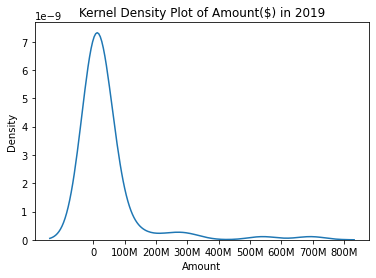

In [ ]:
# Plotting a kernel density (KDE) plot to show the distribution of values in the 'Amount($)' column for the year 2019.

sns.kdeplot(data2019['Amount'])
plt.title('Kernel Density Plot of Amount($) in 2019')
plt.xlabel('Amount')
plt.xticks([0, 1e8, 2e8, 3e8, 4e8, 5e8, 6e8, 7e8, 8e8], ['0', '100M', '200M', '300M', '400M', '500M', '600M', '700M', '800M'])
plt.show()

In [ ]:
impute_value = data2019['Amount'].median()
data2019['Amount']= data2019['Amount'].fillna(impute_value)

In [ ]:
data2019['Amount'].isnull().sum()

0

In [ ]:
data2018.columns

Index(['Year', 'Company', 'Sector', 'Stage', 'Amount', 'Location', 'About'], dtype='object')

In [ ]:
data2019.columns

Index(['Company', 'Location', 'Sector', 'About', 'Amount', 'Stage'], dtype='object')

In [ ]:
# create a new column 'Year' and set it to 2019 to differentiate it from the other datasets
data2019.insert(0,'Year', 2019) 
data2019.head()

,Year,Company,Location,Sector,About,Amount,Stage
0,2019,Bombay Shaving,Notavailable,Ecommerce,Provides a range of male grooming products,6300000.0,Notknown
1,2019,Ruangguru,Mumbai,EdTech,A learning platform that provides topic-based ...,150000000.0,Series C
2,2019,Eduisfun,Mumbai,EdTech,It aims to make learning fun via games.,28000000.0,Fresh funding
3,2019,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.0,Series D
4,2019,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",6000000.0,Notknown


In [ ]:
data2018.to_csv('data2018.csv', index=False)

In [ ]:
data2019.to_csv('data2019.csv', index=False)